# cy-timeseries
Example time series for SBML models. 

In [27]:
%matplotlib inline
from __future__ import print_function, division
import tellurium as te
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame

def remove_brackets(name):
    if name.startswith('[') and name.endswith(']'):
        return name[1:-1]
    else:
        return name

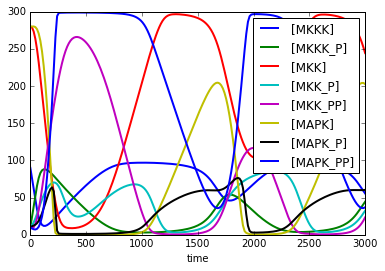

In [30]:
# Load model from biomodels & perform deterministic simulation
det_name = "BIOMD0000000010_sim1"

# load model
r = te.loadSBMLModel("http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000010")
result = r.simulate(0, 3000, steps=200)
r.plot(result, show=False)
plt.savefig("{}.png".format(det_name))
# store SBML network
r.exportToSBML('BIOMD0000000010.xml', current=False)

# clean names
columns = [remove_brackets(name) for name in result.colnames]

# save single simulation
df = DataFrame(data=result, columns=columns)
df.to_csv("{}.csv".format(det_name), sep="\t", index=False)

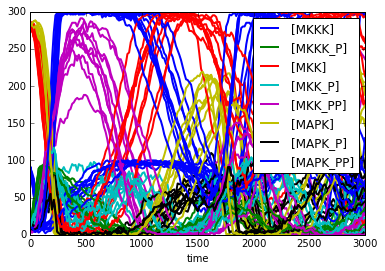

In [31]:
# save repeated stochastic simulation
stochastic_name = "BIOMD0000000010_stochastic"
r.setIntegrator("gillespie")
r.setSeed(100)
for k in range(10):
    r.reset()
    result = r.simulate(0, 3000, steps=200)
    r.plot(result, loc=None, show=False)
    
    # save single simulation
    df = DataFrame(data=result, columns=columns)
    df.to_csv("{}_{:02}.csv".format(stochastic_name, k+1), sep="\t", index=False)
r.plot(result, show=False)
plt.savefig("{}.png".format(stochastic_name))